#### Evaluating the extent to which there is Terminal category consistency in physhchem properties that make the category amenable to TT assessment

Prepared by: Grace Patlewicz <br>
Modified: 11 May 2024 <br>
Changes: Evaluating the terminal categories developed based on Morgan FPs. Updating based on new inventory.

This notebook computes the testing tracks, appends them to the Landscape and additionally creates 2D UMAP plots to help explore the coverage and consistency of testing tracks across terminal categories. Pickle files are created for re-use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
processed_dir = TOP + 'data/processed/'
figures_dir = TOP + 'reports/figures/'

In [4]:
df = pd.read_excel(interim_dir+'final_universe_categorisations_wCDR_100524.xlsx' , index_col = [0])

In [5]:
df.head()

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,...,tsca_dist,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks,CDR2019_NATIONAL_AGG_PV,CDR2020_STATUS
0,IROQAHVXXUQBOS-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCN(CCNC(=O)c1ccc(Cc2ccc(C(O)=O)cc2)cc1)S(=O)...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID90897582,DSSTox_High,4-(Perfluorononyl)oxybenzenesulfonate sodium,91998-13-9,Single Compound,NaN,[Na+].[O-]S(=O)(=O)C1=CC=C(OC(F)(F)C(F)(F)C(F)...,"InChI=1S/C15H5F19O4S.Na/c16-7(17,8(18,19)10(22...",WEKFOCTWTWPVEG-UHFFFAOYSA-M,C15H4F19NaO4S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID90896257,Public_Low,(2S)-2-{Bis[4-(heptadecafluorooctyl)phenyl][(t...,914391-37-0,Single Compound,NaN,CC[Si](CC)(CC)OC([C@@H]1CCCN1)(C1=CC=C(C=C1)C(...,"InChI=1S/C39H31F34NOSi/c1-4-76(5-2,6-3)75-23(2...",PARYPNCCAOUHML-QFIPXVFZSA-N,C39H31F34NOSi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXSID90896196,Public_Low,"2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,9-Heptadecaflu...",157584-47-9,Single Compound,NaN,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,"InChI=1S/C21H10F17NO/c22-14(23,13(40)39(11-7-3...",IDJHICNQDCLWAB-UHFFFAOYSA-N,C21H10F17NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID90896095,Public_Low,"3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,10-Heptadeca...",113823-56-6,Single Compound,NaN,CC1=CC=C(C=C1)S(=O)(=O)OCCC(F)(F)C(F)(F)C(F)(F...,"InChI=1S/C17H11F17O3S/c1-8-2-4-9(5-3-8)38(35,3...",WGCSEECKLMOBLT-UHFFFAOYSA-N,C17H11F17O3S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.drop(['MolWeight',
 'nbAtoms',
 'nbHeavyAtoms',
 'nbC',
 'nbO',
 'nbN',
 'nbAromAtom',
 'nbRing',
 'nbHeteroRing',
 'Sp3Sp2HybRatio',
 'nbRotBd',
 'nbHBdAcc',
 'ndHBdDon',
 'nbLipinskiFailures',
 'TopoPolSurfAir',
 'MolarRefract',
 'CombDipolPolariz',
 'LogP_pred',
 'LogP_predRange',
 'AD_LogP',
 'AD_index_LogP',
 'Conf_index_LogP',
 'MP_pred',
 'MP_predRange',
 'AD_MP',
 'AD_index_MP',
 'Conf_index_MP',
 'BP_pred',
 'BP_predRange',
 'AD_BP',
 'AD_index_BP',
 'Conf_index_BP',
 'LogVP_pred',
 'VP_predRange',
 'AD_VP',
 'AD_index_VP',
 'Conf_index_VP',
 'LogWS_pred',
 'WS_predRange',
 'AD_WS',
 'AD_index_WS',
 'Conf_index_WS',
 'LogHL_pred',
 'HL_predRange',
 'AD_HL',
 'AD_index_HL',
 'Conf_index_HL',
 'RT_pred',
 'AD_RT',
 'AD_index_RT',
 'Conf_index_RT',
 'RT_predRange',
 'LogKOA_pred',
 'KOA_predRange',
 'AD_KOA',
 'AD_index_KOA',
 'Conf_index_KOA',
 'ionization',
 'pKa_a_pred',
 'pKa_a_predRange',
 'pKa_b_pred',
 'pKa_b_predRange',
 'AD_pKa',
 'AD_index_pKa',
 'Conf_index_pKa',
 'LogD55_pred',
 'LogD55_predRange',
 'LogD74_pred',
 'LogD74_predRange',
 'AD_LogD',
 'AD_index_LogD',
 'Conf_index_LogD',
 'LogOH_pred',
 'LogOH_predRange',
 'AD_AOH',
 'AD_index_AOH',
 'Conf_index_AOH',
 'LogBCF_pred',
 'BCF_predRange',
 'AD_BCF',
 'AD_index_BCF',
 'Conf_index_BCF',
 'BioDeg_LogHalfLife_pred',
 'BioDeg_predRange',
 'AD_BioDeg',
 'AD_index_BioDeg',
 'Conf_index_BioDeg',
 'ReadyBiodeg_pred',
 'AD_ReadyBiodeg',
 'AD_index_ReadyBiodeg',
 'Conf_index_ReadyBiodeg',
 'LogKM_pred',
 'KM_predRange',
 'AD_KM',
 'AD_index_KM',
 'Conf_index_KM',
 'LogKoc_pred',
 'Koc_predRange',
 'AD_Koc',
 'AD_index_Koc',
 'Conf_index_Koc',
 'FUB_pred',
 'FUB_predRange',
 'AD_FUB',
 'AD_index_FUB',
 'Conf_index_FUB',
 'Clint_pred',
 'Clint_predRange',
 'AD_Clint',
 'AD_index_Clint',
 'Conf_index_Clint',
 'CACO2_pred',
 'CACO2_predRange',
 'AD_CACO2',
 'AD_index_CACO2',
 'Conf_index_CACO2',
 'CERAPP_Ago_pred',
 'AD_CERAPP_Ago',
 'AD_index_CERAPP_Ago',
 'Conf_index_CERAPP_Ago',
 'CERAPP_Anta_pred',
 'AD_CERAPP_Anta',
 'AD_index_CERAPP_Anta',
 'Conf_index_CERAPP_Anta',
 'CERAPP_Bind_pred',
 'AD_CERAPP_Bind',
 'AD_index_CERAPP_Bind',
 'Conf_index_CERAPP_Bind',
 'CoMPARA_Ago_pred',
 'AD_CoMPARA_Ago',
 'AD_index_CoMPARA_Ago',
 'Conf_index_CoMPARA_Ago',
 'CoMPARA_Anta_pred',
 'AD_CoMPARA_Anta',
 'AD_index_CoMPARA_Anta',
 'Conf_index_CoMPARA_Anta',
 'CoMPARA_Bind_pred',
 'AD_CoMPARA_Bind',
 'AD_index_CoMPARA_Bind',
 'Conf_index_CoMPARA_Bind',
 'CATMoS_VT_pred',
 'CATMoS_NT_pred',
 'CATMoS_EPA_pred',
 'CATMoS_GHS_pred',
 'CATMoS_LD50_pred',
 'CATMoS_LD50_predRange',
 'AD_CATMoS',
 'AD_index_CATMoS',
 'Conf_index_CATMoS',], axis = 1, inplace = True)

In [30]:
df.shape

(15525, 64)

In [31]:
tsca_set = pd.read_csv(processed_dir+'pfas_april2024_tsca_degradation-sdf_OPERA2.9Pred.csv', index_col = [0])
tsca_set

,MolWeight,nbAtoms,nbHeavyAtoms,nbC,nbO,nbN,nbAromAtom,nbRing,nbHeteroRing,Sp3Sp2HybRatio,...,Conf_index_CoMPARA_Bind,CATMoS_VT_pred,CATMoS_NT_pred,CATMoS_EPA_pred,CATMoS_GHS_pred,CATMoS_LD50_pred,CATMoS_LD50_predRange,AD_CATMoS,AD_index_CATMoS,Conf_index_CATMoS
MoleculeID,,,,,,,,,,,,,,,,,,,,,
AACZGCBUSNLCIK-UHFFFAOYSA-N,505.952949,36,31,11,8,0,0,0,0,0.545455,...,0.519,0,1,4,5,8101,[4600-14000],1,0.260,0.445
AALULFMCJUWILT-UHFFFAOYSA-N,485.033031,41,29,11,3,1,0,0,0,1.000000,...,0.540,0,0,2,3,244,[140-430],1,0.341,0.426
ABABGEQVESLYDZ-UHFFFAOYSA-N,468.987777,37,29,11,7,1,0,0,0,0.636364,...,0.535,0,1,4,5,8387,[4700-15000],1,0.297,0.402
ABJSXXCPMHRSGJ-UHFFFAOYSA-N,349.873450,18,17,4,1,0,0,0,0,1.000000,...,0.534,0,0,3,4,1710,[960-3000],1,0.306,0.381
ABLKPIRVCCYBRW-UHFFFAOYSA-N,704.871253,49,42,18,10,1,6,1,0,0.333333,...,0.514,0,1,4,5,7292,[4100-13000],1,0.298,0.754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZKOWTIHKUWUOI-UHFFFAOYSA-N,255.015471,22,17,8,4,1,6,1,0,0.250000,...,0.481,0,0,2,4,426,[240-760],1,0.381,0.423
ZZQYDYODFHABLC-UHFFFAOYSA-N,143.995362,12,8,4,0,0,0,1,0,1.000000,...,0.569,0,0,3,4,1053,[590-1900],1,0.431,0.622
ZZWKTJZMSCLBFA-UHFFFAOYSA-N,430.086250,45,28,14,7,0,0,0,0,0.785714,...,0.473,0,1,3,5,2598,[1500-4600],1,0.307,0.325


In [35]:
opera = pd.read_csv(raw_dir+'DSSTox_PFAS8a7v3_20240426_V2000_QSAR-ready_kek-sdf_OPERA2.9Pred.csv', index_col = [0])

In [38]:
opera = pd.concat([opera, tsca_set], axis = 0)

In [40]:
opera = opera.reset_index()

In [46]:
cols = ['MoleculeID',
 'MolWeight',
 'nbAtoms',
 'nbHeavyAtoms',
 'nbC',
 'nbO',
 'nbN',
 'nbAromAtom',
 'nbRing',
 'nbHeteroRing',
 'Sp3Sp2HybRatio',
 'nbRotBd',
 'nbHBdAcc',
 'ndHBdDon',
 'nbLipinskiFailures',
 'TopoPolSurfAir',
 'MolarRefract',
 'CombDipolPolariz',
 'LogP_pred',
 'LogP_predRange',
 'AD_LogP',
 'AD_index_LogP',
 'Conf_index_LogP',
 'MP_pred',
 'MP_predRange',
 'AD_MP',
 'AD_index_MP',
 'Conf_index_MP',
 'BP_pred',
 'BP_predRange',
 'AD_BP',
 'AD_index_BP',
 'Conf_index_BP',
 'LogVP_pred',
 'VP_predRange',
 'AD_VP',
 'AD_index_VP',
 'Conf_index_VP',
 'LogWS_pred',
 'WS_predRange',
 'AD_WS',
 'AD_index_WS',
 'Conf_index_WS',
 'LogHL_pred',
 'HL_predRange',
 'AD_HL',
 'AD_index_HL',
 'Conf_index_HL',
 'RT_pred',
 'AD_RT',
 'AD_index_RT',
 'Conf_index_RT',
 'RT_predRange',
 'LogKOA_pred',
 'KOA_predRange',
 'AD_KOA',
 'AD_index_KOA',
 'Conf_index_KOA',
 'ionization',
 'pKa_a_pred',
 'pKa_a_predRange',
 'pKa_b_pred',
 'pKa_b_predRange',
 'AD_pKa',
 'AD_index_pKa',
 'Conf_index_pKa',
 'LogD55_pred',
 'LogD55_predRange',
 'LogD74_pred',
 'LogD74_predRange',
 'AD_LogD',
 'AD_index_LogD',
 'Conf_index_LogD',]

In [48]:
opera = opera[cols]

In [51]:
df = pd.merge(df, opera, left_on = 'dtxsid', right_on = 'MoleculeID', how = 'left')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15525 entries, 0 to 15524
Columns: 137 entries, dtxsid to Conf_index_LogD
dtypes: float64(76), int64(2), object(59)
memory usage: 16.3+ MB


In [54]:
df.TSCA_STATUS.value_counts(dropna = False)

unclassified    14962
inactive          326
active            237
Name: TSCA_STATUS, dtype: int64

In [55]:
df['HLC'] = df['LogHL_pred'].apply(lambda x: 10**x)
df['WS_pred_mol/L'] = df['LogWS_pred'].apply(lambda x: 10**x)
df['WS_pred_mg/L'] = df[['WS_pred_mol/L', 'MolWeight']].apply(lambda x: 1000*(x[0]*x[1]), axis = 1)

In [56]:
df.groupby('dtxsid').filter(lambda x: len(x) >1).head()

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,...,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD


In [57]:
df['MP_pred'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15525 entries, 0 to 15524
Series name: MP_pred
Non-Null Count  Dtype  
--------------  -----  
15107 non-null  float64
dtypes: float64(1)
memory usage: 242.6 KB


In [58]:
df4 = df.set_index('dtxsid')

In [59]:
df4

,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,...,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD
dtxsid,,,,,,,,,,,,,,,,,,,,,
IROQAHVXXUQBOS-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCN(CCNC(=O)c1ccc(Cc2ccc(C(O)=O)cc2)cc1)S(=O)...,NaN,NaN,NaN,NaN,...,0.0,0.171,0.498,4.67,[3.1:6.24],6.54,[4.97:8.11],0.0,0.2425,0.3940
DTXSID90897582,DSSTox_High,4-(Perfluorononyl)oxybenzenesulfonate sodium,91998-13-9,Single Compound,NaN,[Na+].[O-]S(=O)(=O)C1=CC=C(OC(F)(F)C(F)(F)C(F)...,"InChI=1S/C15H5F19O4S.Na/c16-7(17,8(18,19)10(22...",WEKFOCTWTWPVEG-UHFFFAOYSA-M,C15H4F19NaO4S,664.210,...,0.0,0.180,0.237,3.00,[2.52:3.48],1.10,[-1.27:3.47],0.0,0.2895,0.3280
DTXSID90896257,Public_Low,(2S)-2-{Bis[4-(heptadecafluorooctyl)phenyl][(t...,914391-37-0,Single Compound,NaN,CC[Si](CC)(CC)OC([C@@H]1CCCN1)(C1=CC=C(C=C1)C(...,"InChI=1S/C39H31F34NOSi/c1-4-76(5-2,6-3)75-23(2...",PARYPNCCAOUHML-QFIPXVFZSA-N,C39H31F34NOSi,1203.714,...,0.0,0.000,0.000,8.18,[5.6:10.76],8.18,[5.6:10.76],0.0,0.0800,0.0500
DTXSID90896196,Public_Low,"2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,9-Heptadecaflu...",157584-47-9,Single Compound,NaN,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,"InChI=1S/C21H10F17NO/c22-14(23,13(40)39(11-7-3...",IDJHICNQDCLWAB-UHFFFAOYSA-N,C21H10F17NO,615.290,...,0.0,0.214,0.100,8.49,[6.49:10.49],8.49,[6.3:10.68],0.0,0.2840,0.1645
DTXSID90896095,Public_Low,"3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,10-Heptadeca...",113823-56-6,Single Compound,NaN,CC1=CC=C(C=C1)S(=O)(=O)OCCC(F)(F)C(F)(F)C(F)(F...,"InChI=1S/C17H11F17O3S/c1-8-2-4-9(5-3-8)38(35,3...",WGCSEECKLMOBLT-UHFFFAOYSA-N,C17H11F17O3S,618.300,...,0.0,0.000,0.000,6.50,[6.5:6.5],6.50,[6.5:6.5],0.0,0.2165,0.3860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIQDQEQBQRGFDF-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCC[P+](CCCC)(CCCC)(CC(C)=O).[N-](C)S(=O)(=O)...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZKYPCYQMVQMYAB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCC[P+](CCCC)(CCCC)(CC(O)CC(O)=O).[O-]S(=O)(=...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZOJATUBFKQLTCD-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCCOP(C)(=O)(CCCC).OS(=O)(=O)C(F)(F)C(F)(F)C(...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
test_track = []
for i, row in df4.iterrows():
    if (row['MP_pred'] >25) & (row['WS_pred_mg/L'] < 0.5):
        test_track.append([i,'A'])
    elif (row['MP_pred'] >25) & (row['WS_pred_mg/L'] >=0.5):
        test_track.append([i,'B'])
    elif (row['BP_pred'] <25) & (row['WS_pred_mg/L'] < 0.5):
        test_track.append([i,'D'])
    elif (row['BP_pred'] <25) & (row['WS_pred_mg/L'] >=0.5) & (row['HLC'] <0.1):
        test_track.append([i,'C'])
    elif (row['BP_pred'] <25) & (row['WS_pred_mg/L'] >=0.5) & (row['HLC'] >=0.1):
        test_track.append([i,'D'])
    elif (row['MP_pred'] <=25) & (row['BP_pred'] >=25) & (row['WS_pred_mg/L'] >=0.5) & (10**row['LogVP_pred'] <=75):
        test_track.append([i,'B'])
    elif (row['MP_pred'] <=25) & (row['BP_pred'] >=25) & (row['WS_pred_mg/L'] <0.5):
        test_track.append([i, 'C'])
    elif (row['MP_pred'] <=25) & (row['BP_pred'] >=25) & (row['WS_pred_mg/L'] >0.5) & (10**row['LogVP_pred'] >75):
        test_track.append([i, 'C'])
    else:
        test_track.append([i, 'not_determined'])
                      

In [61]:
test_track = {k:v for k, v in zip(pd.DataFrame(test_track)[0], pd.DataFrame(test_track)[1])}

In [63]:
#test_track

In [64]:
df['test_track'] = df['dtxsid'].replace(test_track)

In [65]:
df['test_track'].value_counts(dropna = False, normalize = True)

B                 0.632786
C                 0.200644
A                 0.132689
not_determined    0.027762
D                 0.006119
Name: test_track, dtype: float64

In [66]:
df['test_track'].value_counts(dropna = False)

B                 9824
C                 3115
A                 2060
not_determined     431
D                   95
Name: test_track, dtype: int64

In [67]:
df[(df['TSCA_STATUS'] == 'active') & (df['ID'].isnull())]['test_track'].value_counts(dropna = False)

C                 85
B                 71
A                 25
D                 10
not_determined     8
Name: test_track, dtype: int64

In [68]:
df[(df['TSCA_STATUS'] == 'active') & (df['ID'].isnull())]['test_track'].value_counts(normalize = True, dropna = False)

C                 0.427136
B                 0.356784
A                 0.125628
D                 0.050251
not_determined    0.040201
Name: test_track, dtype: float64

In [69]:
#chk 15092+322

In [70]:
df[df['test_track'] == 'not_determined'][[ 'MolWeight', 'LogP_pred']]

,MolWeight,LogP_pred
2041,589.953003,-0.09
2541,489.959391,-0.80
11450,545.877328,4.92
13348,498.939185,4.30
13498,446.949781,4.82
...,...,...
15520,NaN,NaN
15521,NaN,NaN
15522,NaN,NaN
15523,NaN,NaN


In [71]:
writer = pd.ExcelWriter(interim_dir+'final_universe_wtest_track_120524.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df.to_excel(writer)



writer.close()

In [72]:
import sys

In [73]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [74]:
from model_functions import *

In [75]:
results = {}
for i, group in df.groupby('group_str'):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results[i] = a

In [76]:
len(results)

128

In [77]:
df1 = df.set_index('dtxsid')

In [78]:
phys_dict = {}
for i, group in df1.groupby('group_str'):
    phys_dict[i] = group[['LogP_pred', 'MP_pred', 'BP_pred','LogVP_pred', 
      'HLC',  'WS_pred_mg/L', 'test_track']]

In [81]:
#phys_dict.keys()

In [82]:
phys_dict["('Aromatic PFASs', 'gte7', nan, nan)"]['test_track'].value_counts()

B    323
A    232
C     29
Name: test_track, dtype: int64

In [83]:
df2 = pd.concat([pd.DataFrame([{k:len(v) for k,v in phys_dict.items()}]).T, pd.DataFrame([{k:v['test_track'].nunique() for k,v in phys_dict.items()}]).T], axis = 1)

In [84]:
df2.columns = ['category_size', '#testing_tracks']

In [85]:
df2[df2['#testing_tracks'] >0]

,category_size,#testing_tracks
"('Aromatic PFASs', 'gte7', nan, nan)",584,3
"('Aromatic PFASs', 'lt7', 1.0, nan)",250,3
"('Aromatic PFASs', 'lt7', 2.0, 1.0)",235,3
"('Aromatic PFASs', 'lt7', 2.0, 2.0)",592,3
"('Aromatic PFASs', 'lt7', 2.0, 3.0)",89,3
...,...,...
"('unclassified', 'lt7', 2.0, 3.0)",13,2
"('unclassified', 'lt7', 3.0, 1.0)",22,3
"('unclassified', 'lt7', 3.0, 2.0)",11,1
"('unclassified', 'lt7', 3.0, 3.0)",20,2


In [53]:
#df_wphychem1[df_wphychem1['test_track'].isnull()]

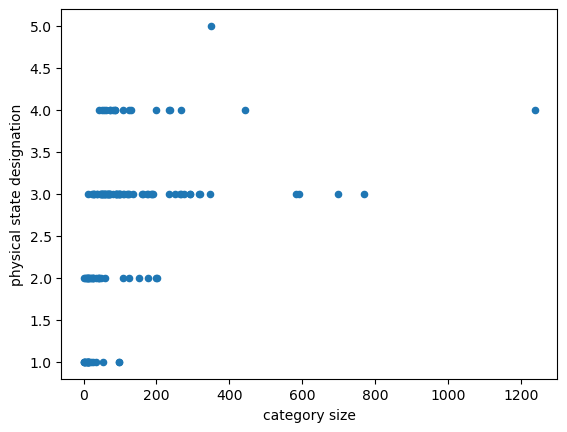

In [86]:
df2[df2['#testing_tracks'] >0].plot(kind = 'scatter', x = 'category_size', y = '#testing_tracks')
plt.ylabel('physical state designation')
plt.xlabel('category size')
plt.savefig(figures_dir+'FigureS5_120524.png', dpi = 300)

In [87]:
df2[df2['#testing_tracks']==2]

,category_size,#testing_tracks
"('Aromatic PFASs', 'lt7', 4.0, 1.0)",58,2
"('Aromatic PFASs', 'lt7', 4.0, 2.0)",202,2
"('HFCs', 'gte7', nan, nan)",125,2
"('Other PFASs', 'lt7', 2.0, 1.0)",49,2
"('Other PFASs, cyclic', 'gte7', 4.0, nan)",6,2
"('Other PFASs, cyclic', 'lt7', 1.0, 1.0)",25,2
"('Other PFASs, cyclic', 'lt7', 1.0, 2.0)",9,2
"('Other PFASs, cyclic', 'lt7', 3.0, 2.0)",25,2
"('PFAA precursors', 'lt7', 1.0, 1.0)",43,2
"('PFAA precursors, cyclic', 'lt7', 1.0, 2.0)",27,2


In [88]:
df2[df2['#testing_tracks']==1]

,category_size,#testing_tracks
"('Other PFASs, cyclic', 'gte7', 1.0, nan)",2,1
"('Other PFASs, cyclic', 'gte7', 2.0, nan)",4,1
"('Other PFASs, cyclic', 'gte7', 3.0, nan)",2,1
"('PFAA precursors, cyclic', 'lt7', 1.0, 1.0)",19,1
"('PFAAs, cyclic', 'gte7', nan, nan)",1,1
"('PFAAs, cyclic', 'lt7', 1.0, nan)",35,1
"('PFAAs, cyclic', 'lt7', 2.0, nan)",14,1
"('PFAAs, cyclic', 'lt7', 3.0, 2.0)",9,1
"('PFAAs, cyclic', 'lt7', 3.0, 3.0)",12,1
"('PolyFCA derivatives', 'lt7', 4.0, 1.0)",52,1


In [90]:
df2[df2['#testing_tracks']==4]

,category_size,#testing_tracks
"('Aromatic PFASs', 'lt7', 2.0, 5.0)",1238,4
"('HFCs', 'lt7', 3.0, nan)",62,4
"('Other PFASs', 'lt7', 3.0, 2.0)",81,4
"('Other PFASs', 'lt7', 3.0, 3.0)",198,4
"('Other PFASs, cyclic', 'lt7', 3.0, 1.0)",72,4
"('PFAA precursors', 'lt7', 1.0, 2.0)",51,4
"('PFAA precursors', 'lt7', 2.0, 1.0)",41,4
"('PFAA precursors', 'lt7', 2.0, 2.0)",108,4
"('PFAA precursors', 'lt7', 2.0, 3.0)",56,4
"('PFAA precursors', 'lt7', 4.0, 1.0)",130,4


In [91]:
import umap
import random

In [92]:
def umap_plots(a, label = None):
    summary = {}
    summary['label'] = label
    model = umap.UMAP(random_state=42, n_jobs = 1)
    #model = TSNE(learning_rate = 200, perplexity=a[label].shape[0]-1, random_state = 42)
    umap_features = model.fit_transform(a[label])
    umap_features = pd.DataFrame(umap_features, index = a[label].index, columns = ['umap_x', 'umap_y'])
    #umap_df = pd.concat([umap_features, b[label]], axis = 1)
    summary['umap'] = umap_features
    return summary

In [61]:
#{k:v.shape for k,v in results.items()  if v.shape[0] >1}

In [93]:
umap_lst = []
for k,v in results.items():
    try:
        umap_lst.append(umap_plots(results,  label = k))
    except Exception as error:
        print(k)

/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 0 edges.
It has fully disconnected 2 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


('Other PFASs, cyclic', 'gte7', 1.0, nan)


/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 0 edges.
It has fully disconnected 2 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


('Other PFASs, cyclic', 'gte7', 3.0, nan)


/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the d

('unclassified', 'lt7', 2.0, 2.0)


/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [94]:

mylst = []
for i in range(len(umap_lst)):
    mylst.append(umap_lst[i]['label'])

In [95]:
umap_phys = {}
for i in range(len(umap_lst)):
    for e in mylst:
        if umap_lst[i]['label'] == e:
            a = pd.concat([umap_lst[i]['umap'], phys_dict[e]], axis = 1)
            umap_phys[e] = a

In [96]:
import pickle

pickle.dump( umap_phys, open(interim_dir+ "umap_lst_physchem_120524.pkl", "wb" ) )

In [145]:
pickle.dump( umap_lst, open(interim_dir+ "umap_lst_120524.pkl", "wb" ) )

In [136]:
umap_phys[umap_lst[6]['label']][umap_phys[umap_lst[6]['label']]['test_track'] !='not_determined']

,umap_x,umap_y,LogP_pred,MP_pred,BP_pred,LogVP_pred,HLC,WS_pred_mg/L,test_track
DTXSID80895916,2.395166,4.211583,4.13,105.0,249.0,-2.34,2.884032e-07,684.208462,B
DTXSID90931596,-0.628430,6.858975,2.74,184.0,305.0,-7.29,1.096478e-10,3537.579607,B
DTXSID90905419,1.043842,19.713129,3.92,213.0,297.0,-7.72,3.981072e-12,30.259275,B
DTXSID90905414,0.996892,19.684233,4.11,177.0,303.0,-9.15,1.071519e-11,126.451568,B
DTXSID90896752,0.266581,2.312685,4.15,154.0,292.0,-4.06,5.495409e-12,620.391802,B
...,...,...,...,...,...,...,...,...,...
YJESQYMOXBYMBH-UHFFFAOYSA-N,-4.108370,-3.200105,2.71,92.0,408.0,-6.29,4.786301e-11,4922.452438,B
ZBPJKTZABUCBNM-UHFFFAOYSA-N,-4.111563,-3.194986,3.05,108.0,280.0,-5.62,2.398833e-08,32.114617,B
ZCXDMKHTHARCOC-UHFFFAOYSA-N,-15.924853,-4.802257,5.27,167.0,228.0,-5.19,1.380384e-12,0.271237,A
ZFHCSLWPWTWLSE-UHFFFAOYSA-N,-0.381173,5.091892,2.63,186.0,239.0,-8.06,8.128305e-09,2017.754342,B


In [143]:
umap_phys[umap_lst[71]['label']]['test_track'].value_counts()

B    52
Name: test_track, dtype: int64

In [142]:
for i in range(len(umap_lst)):
    if umap_lst[i]['label'] in df2[df2['#testing_tracks']==1].index:
        print(i, umap_lst[i]['label'])

23 ('Other PFASs, cyclic', 'gte7', 2.0, nan)
49 ('PFAA precursors, cyclic', 'lt7', 1.0, 1.0)
61 ('PFAAs, cyclic', 'gte7', nan, nan)
62 ('PFAAs, cyclic', 'lt7', 1.0, nan)
63 ('PFAAs, cyclic', 'lt7', 2.0, nan)
65 ('PFAAs, cyclic', 'lt7', 3.0, 2.0)
66 ('PFAAs, cyclic', 'lt7', 3.0, 3.0)
71 ('PolyFCA derivatives', 'lt7', 4.0, 1.0)
73 ('PolyFCA derivatives', 'lt7', 4.0, 3.0)
85 ('Polyfluoroalkyl acids, cyclic', 'lt7', 2.0, nan)
87 ('Polyfluoroalkyl acids, cyclic', 'lt7', 4.0, nan)
109 ('others, cyclic', 'lt7', 2.0, 3.0)
114 ('others, cyclic', 'lt7', 3.0, 4.0)
115 ('unclassified', 'gte7', nan, nan)
116 ('unclassified', 'lt7', 1.0, 1.0)
117 ('unclassified', 'lt7', 1.0, 2.0)
119 ('unclassified', 'lt7', 2.0, 1.0)
122 ('unclassified', 'lt7', 3.0, 2.0)


In [117]:
umap_lst[8]['label']
umap_lst[14]['label']

"('HFCs', 'lt7', 3.0, nan)"

['C', 'A', 'B', 'D']


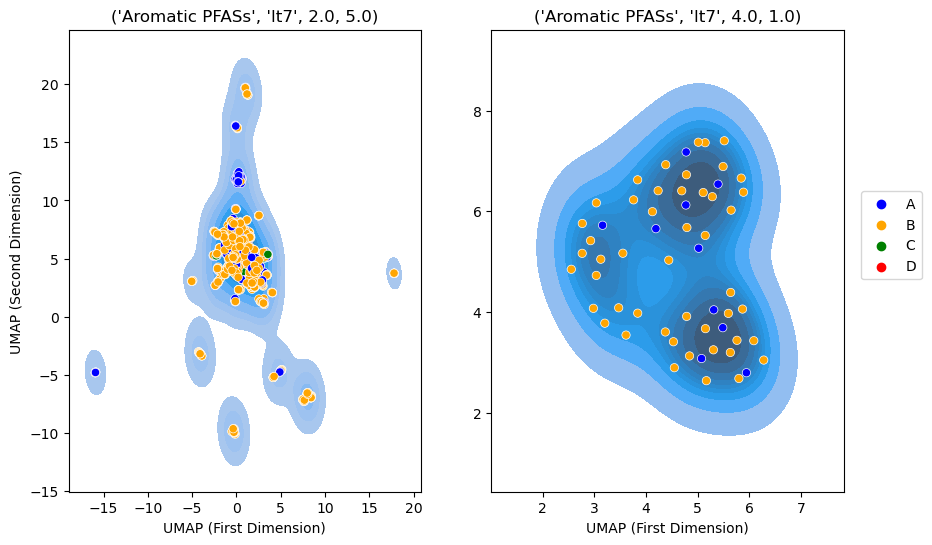

In [144]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,6))
plt.subplots_adjust(hspace = 0.8)
#colors = {1:'red', 0 : 'blue'}
color_dict = dict({'A':'blue',
                  'B':'orange',
                  'C': 'green',
                  'D': 'red'
                  })
ax1.title.set_text(umap_lst[6]['label'])
ax2.title.set_text(umap_lst[8]['label'])
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax1 = sns.kdeplot(x="umap_x", y="umap_y", fill = True,
                     data=umap_phys[umap_lst[6]['label']][umap_phys[umap_lst[6]['label']]['test_track'] !='not_determined'] ,ax = ax1)
ax1 = sns.scatterplot(x="umap_x", y="umap_y", hue = 'test_track',palette = color_dict,
                     data=umap_phys[umap_lst[6]['label']][umap_phys[umap_lst[6]['label']]['test_track'] !='not_determined'], ax = ax1)

ax2 = sns.kdeplot(x="umap_x", y="umap_y", fill = True,
                     data=umap_phys[umap_lst[8]['label']], ax = ax2)
ax2 = sns.scatterplot(x="umap_x", y="umap_y", hue = 'test_track', hue_order =  ['A', 'B', 'C', 'D'], palette = color_dict,
                     data=umap_phys[umap_lst[8]['label']], ax = ax2)
ax1.get_legend().remove()
ax2.set_ylabel('')
ax1.set_ylabel('UMAP (Second Dimension)')
ax1.set_xlabel('UMAP (First Dimension)')
ax2.set_xlabel('UMAP (First Dimension)')
#handles, labels = ax1.get_legend_handles_labels()
print(labels)
#legend_order = ['A', 'B', 'C', 'D']
#labels = ['C', 'A', 'B', 'D']
l = plt.legend(bbox_to_anchor=(1.05,0.65), loc=2, borderaxespad=0.)
fig.savefig(figures_dir+'Figure9_120524.png', dpi = 300, bbox_inches = 'tight')